In [49]:
import tensorflow as tf
import numpy as np
import os

In [50]:
file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')


In [51]:
text = open(file, 'rb').read().decode(encoding='utf-8')

In [52]:
print(text[:200])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you


In [53]:
len(text)

1115394

In [54]:
len(set(text))

65

In [55]:
vocab = sorted(set(text))

In [56]:
vocab,len(vocab)

(['\n',
  ' ',
  '!',
  '$',
  '&',
  "'",
  ',',
  '-',
  '.',
  '3',
  ':',
  ';',
  '?',
  'A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'G',
  'H',
  'I',
  'J',
  'K',
  'L',
  'M',
  'N',
  'O',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'U',
  'V',
  'W',
  'X',
  'Y',
  'Z',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'],
 65)

In [57]:
c2i = {a:i for i,a in enumerate(vocab)}

In [58]:
c2i

{'\n': 0,
 ' ': 1,
 '!': 2,
 '$': 3,
 '&': 4,
 "'": 5,
 ',': 6,
 '-': 7,
 '.': 8,
 '3': 9,
 ':': 10,
 ';': 11,
 '?': 12,
 'A': 13,
 'B': 14,
 'C': 15,
 'D': 16,
 'E': 17,
 'F': 18,
 'G': 19,
 'H': 20,
 'I': 21,
 'J': 22,
 'K': 23,
 'L': 24,
 'M': 25,
 'N': 26,
 'O': 27,
 'P': 28,
 'Q': 29,
 'R': 30,
 'S': 31,
 'T': 32,
 'U': 33,
 'V': 34,
 'W': 35,
 'X': 36,
 'Y': 37,
 'Z': 38,
 'a': 39,
 'b': 40,
 'c': 41,
 'd': 42,
 'e': 43,
 'f': 44,
 'g': 45,
 'h': 46,
 'i': 47,
 'j': 48,
 'k': 49,
 'l': 50,
 'm': 51,
 'n': 52,
 'o': 53,
 'p': 54,
 'q': 55,
 'r': 56,
 's': 57,
 't': 58,
 'u': 59,
 'v': 60,
 'w': 61,
 'x': 62,
 'y': 63,
 'z': 64}

In [59]:
c2i['z']

64

In [60]:
i2c = np.array(vocab)

In [61]:
i2c[64]

'z'

In [62]:
text_as_seq_of_ints=np.array([c2i[a] for a in text])
text[:10],text_as_seq_of_ints[:10]

('First Citi', array([18, 47, 56, 57, 58,  1, 15, 47, 58, 47]))

In [63]:
i2c[text_as_seq_of_ints[:10]]

array(['F', 'i', 'r', 's', 't', ' ', 'C', 'i', 't', 'i'], dtype='<U1')

In [64]:
'''
example_texts = ['abcdefg', 'xyz']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
print('chars',chars)

ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)
ids = ids_from_chars(chars)
print('ids',ids)

chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)
chars = chars_from_ids(ids)
print('chars',chars)
'''


"\nexample_texts = ['abcdefg', 'xyz']\n\nchars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')\nprint('chars',chars)\n\nids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)\nids = ids_from_chars(chars)\nprint('ids',ids)\n\nchars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)\nchars = chars_from_ids(ids)\nprint('chars',chars)\n"

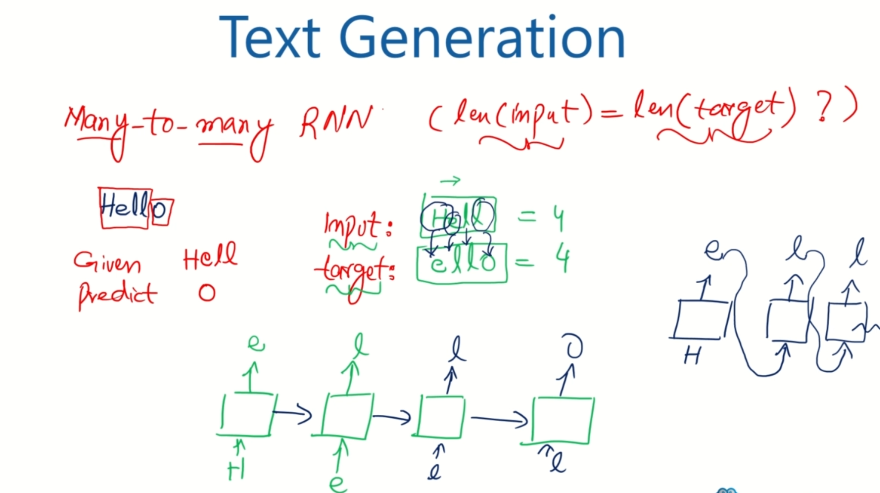

In [65]:
seq_length=120
examples_per_epoch=len(text)//(seq_length+1)

In [66]:
'''all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids
'''

"all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))\nall_ids\n"

In [67]:
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_seq_of_ints)

In [68]:
for i in char_dataset.take(20):
    print(i2c[i.numpy()],i.numpy())


F 18
i 47
r 56
s 57
t 58
  1
C 15
i 47
t 58
i 47
z 64
e 43
n 52
: 10

 0
B 14
e 43
f 44
o 53
r 56


In [69]:
seq= char_dataset.batch(seq_length+1,drop_remainder=True)

In [70]:
for i in seq.take(2):
  print(i2c[i.numpy()])

['F' 'i' 'r' 's' 't' ' ' 'C' 'i' 't' 'i' 'z' 'e' 'n' ':' '\n' 'B' 'e' 'f'
 'o' 'r' 'e' ' ' 'w' 'e' ' ' 'p' 'r' 'o' 'c' 'e' 'e' 'd' ' ' 'a' 'n' 'y'
 ' ' 'f' 'u' 'r' 't' 'h' 'e' 'r' ',' ' ' 'h' 'e' 'a' 'r' ' ' 'm' 'e' ' '
 's' 'p' 'e' 'a' 'k' '.' '\n' '\n' 'A' 'l' 'l' ':' '\n' 'S' 'p' 'e' 'a'
 'k' ',' ' ' 's' 'p' 'e' 'a' 'k' '.' '\n' '\n' 'F' 'i' 'r' 's' 't' ' ' 'C'
 'i' 't' 'i' 'z' 'e' 'n' ':' '\n' 'Y' 'o' 'u' ' ' 'a' 'r' 'e' ' ' 'a' 'l'
 'l' ' ' 'r' 'e' 's' 'o' 'l' 'v' 'e' 'd' ' ' 'r' 'a' 't']
['h' 'e' 'r' ' ' 't' 'o' ' ' 'd' 'i' 'e' ' ' 't' 'h' 'a' 'n' ' ' 't' 'o'
 ' ' 'f' 'a' 'm' 'i' 's' 'h' '?' '\n' '\n' 'A' 'l' 'l' ':' '\n' 'R' 'e'
 's' 'o' 'l' 'v' 'e' 'd' '.' ' ' 'r' 'e' 's' 'o' 'l' 'v' 'e' 'd' '.' '\n'
 '\n' 'F' 'i' 'r' 's' 't' ' ' 'C' 'i' 't' 'i' 'z' 'e' 'n' ':' '\n' 'F' 'i'
 'r' 's' 't' ',' ' ' 'y' 'o' 'u' ' ' 'k' 'n' 'o' 'w' ' ' 'C' 'a' 'i' 'u'
 's' ' ' 'M' 'a' 'r' 'c' 'i' 'u' 's' ' ' 'i' 's' ' ' 'c' 'h' 'i' 'e' 'f'
 ' ' 'e' 'n' 'e' 'm' 'y' ' ' 't' 'o' ' ' 't' 'h' 'e' ' ']


In [71]:
def f_make_input_target_pairs(s):
    input_text = s[:-1]
    target_text = s[1:]
    return input_text,target_text

In [72]:
dataset = seq.map(f_make_input_target_pairs)

In [73]:
dataset

<_MapDataset element_spec=(TensorSpec(shape=(120,), dtype=tf.int64, name=None), TensorSpec(shape=(120,), dtype=tf.int64, name=None))>

In [74]:
for X,y in dataset.take(2):
    print(i2c[X.numpy()])
    print(i2c[y.numpy()])

['F' 'i' 'r' 's' 't' ' ' 'C' 'i' 't' 'i' 'z' 'e' 'n' ':' '\n' 'B' 'e' 'f'
 'o' 'r' 'e' ' ' 'w' 'e' ' ' 'p' 'r' 'o' 'c' 'e' 'e' 'd' ' ' 'a' 'n' 'y'
 ' ' 'f' 'u' 'r' 't' 'h' 'e' 'r' ',' ' ' 'h' 'e' 'a' 'r' ' ' 'm' 'e' ' '
 's' 'p' 'e' 'a' 'k' '.' '\n' '\n' 'A' 'l' 'l' ':' '\n' 'S' 'p' 'e' 'a'
 'k' ',' ' ' 's' 'p' 'e' 'a' 'k' '.' '\n' '\n' 'F' 'i' 'r' 's' 't' ' ' 'C'
 'i' 't' 'i' 'z' 'e' 'n' ':' '\n' 'Y' 'o' 'u' ' ' 'a' 'r' 'e' ' ' 'a' 'l'
 'l' ' ' 'r' 'e' 's' 'o' 'l' 'v' 'e' 'd' ' ' 'r' 'a']
['i' 'r' 's' 't' ' ' 'C' 'i' 't' 'i' 'z' 'e' 'n' ':' '\n' 'B' 'e' 'f' 'o'
 'r' 'e' ' ' 'w' 'e' ' ' 'p' 'r' 'o' 'c' 'e' 'e' 'd' ' ' 'a' 'n' 'y' ' '
 'f' 'u' 'r' 't' 'h' 'e' 'r' ',' ' ' 'h' 'e' 'a' 'r' ' ' 'm' 'e' ' ' 's'
 'p' 'e' 'a' 'k' '.' '\n' '\n' 'A' 'l' 'l' ':' '\n' 'S' 'p' 'e' 'a' 'k'
 ',' ' ' 's' 'p' 'e' 'a' 'k' '.' '\n' '\n' 'F' 'i' 'r' 's' 't' ' ' 'C' 'i'
 't' 'i' 'z' 'e' 'n' ':' '\n' 'Y' 'o' 'u' ' ' 'a' 'r' 'e' ' ' 'a' 'l' 'l'
 ' ' 'r' 'e' 's' 'o' 'l' 'v' 'e' 'd' ' ' 'r' 'a' 't']
['h' 'e' '

In [75]:
BS = 50
dataset = dataset.shuffle(1000).batch(BS,drop_remainder=True)

In [76]:
VS=len(vocab)
ED=100 # 100 size dimestion vector for embedding
NU=1024
VS


65

In [77]:
def f_make_model(VS,ED,NU,BS):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VS,ED,batch_input_shape=[BS,None]),
        tf.keras.layers.GRU(NU,return_sequences=True,
                           stateful=True),
        tf.keras.layers.Dense(VS)
    ])
    return model

In [78]:
model =f_make_model(VS,ED,NU,BS)

In [79]:
def f_loss(y,y_hat):
  return tf.keras.losses.sparse_categorical_crossentropy(y,y_hat,from_logits=True)

In [80]:
model.compile(optimizer='adam',loss=f_loss)

In [81]:
checkpoints_dir = './tr_chechpoints_2'
checkpoint_prefix = os.path.join(checkpoints_dir,"chpt_{epoch}")
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [82]:
histroy = model.fit(dataset,epochs=2,
                   callbacks=[checkpoint_callback])

Epoch 1/2
184/184 [==============================] - 845s 5s/step - loss: 2.8311
Epoch 2/2
184/184 [==============================] - 851s 5s/step - loss: 2.1017


In [87]:
model = f_make_model(VS,ED,NU,1)

In [88]:
model.load_weights(tf.train.latest_checkpoint(checkpoints_dir))

In [89]:
model.build(tf.TensorShape([1,None]))

In [90]:
def f_write_now(model,ss):
    N = 2000
    ie = [c2i[a] for a in ss]
    ie = tf.expand_dims(ie,0)
    g_text = []
    model.reset_states()
    for i in range(N):
        p = model(ie)
        p = tf.squeeze(p,0)
        p_id = tf.random.categorical(p,num_samples=1)[-1,0].numpy()
        ie = tf.expand_dims([p_id],0)
        g_text.append(i2c[p_id])
    return (ss + ''.join(g_text))


In [92]:
print(f_write_now(model,u"MIANTA: "))

MIANTA: she he; ore that?
Now wo wour be are woll be:
Of riend, sim, and havere the we ro, and what buel now: gesthes go be themen loms
Ond mo not suced's follispe so her forie,
noo, athe heart ass isee,
she lut these my pald to to daid, a vir:
But Cleazens.

HALTENE:
I sor bete Pintary felt, paid har us,
nt lack; th the hear him viand sick:
I pairmy the ad whe habk?
Your gove not grie.

LICALTA:
Carre's buce-sorest net?

LUCENIO:
Sar''s by the son, a rovus,
Wey soy, if the faur uboured but we co te brifor that in.

TETRA:
My hing gitnin?
thoue, lake is not beer I commed,
And spuntlous you lold bure ones forme, will, sif
are sulll, I condingarged Banen;
You the makee: gounks a mangle to drouge
I
O will, coud wo son soncoblo, the,

BIONTENNO:
He rete's will, the ver sanse oun shene whou'd dongian, to you hin o,

ure no now penco, on the Kauld,
Whe casses.

AOTHORY IS shat the doust!
Wharn woll wave of the bertnres, for to cake
Bether'y? Thee hist beathther shough wald!

CULASI:
The meot